## 4.1 影像的疊加與相減   
### add() 影像疊加
可以將不同的影像中，同樣位置像素的顏色數值相加 


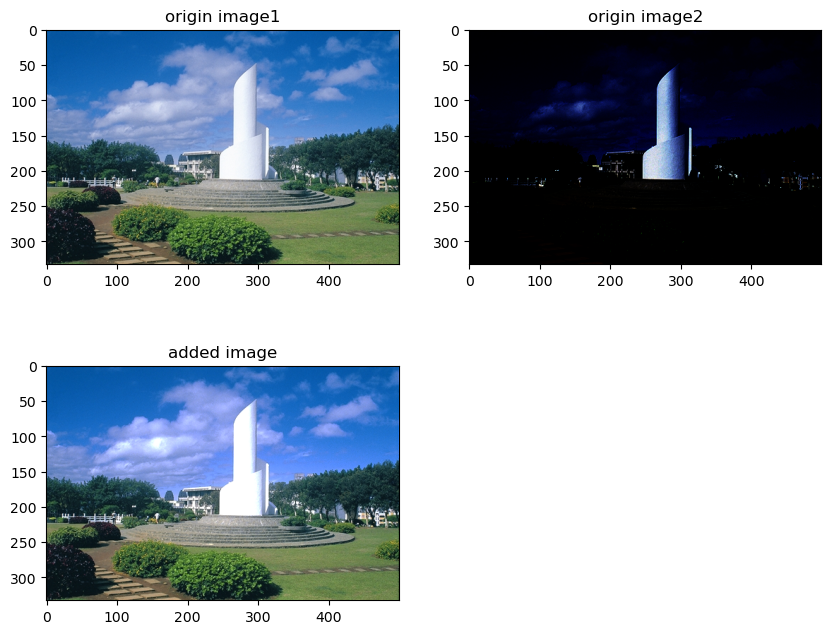

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c =  255.0 / ( 255.0 ** gamma )
    x  = np.linspace( 0, 255, 256)
    table = x ** gamma * c
    if f.ndim != 3:
        for x in range( nr ):
            for y in range( nc ):
                g[x,y] = table[f[x,y]]
    else:
        for x in range( nr ):
            for y in range( nc ):
                for k in range( 3 ):
                    g[x,y,k] = table[f[x,y,k]]
    return g

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = gamma_correction( img1, 10.0 )
output = cv2.add(img1, img2)  

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image1') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('origin image2') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('added image') 
plt.imshow(output)

### addWeighted() 影像權重疊加
將不同的影像中，同樣位置像素的顏色數值，以「指定的權重」( 0～1 ) 進行相加    
使用方式：cv2.addWeighted(img1, alpha, img2, beta, gamma)       
計算公式：img1*alpha + img2*beta + gamma

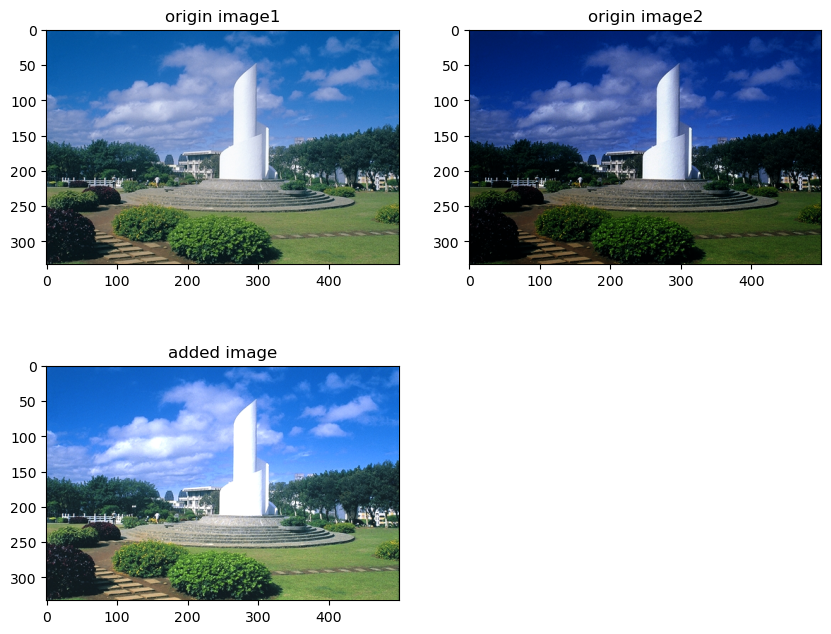

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c =  255.0 / ( 255.0 ** gamma )
    x  = np.linspace( 0, 255, 256)
    table = x ** gamma * c
    if f.ndim != 3:
        for x in range( nr ):
            for y in range( nc ):
                g[x,y] = table[f[x,y]]
    else:
        for x in range( nr ):
            for y in range( nc ):
                for k in range( 3 ):
                    g[x,y,k] = table[f[x,y,k]]
    return g

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = gamma_correction( img1, 2.0 )
output = cv2.addWeighted(img1, 0.8, img2, 0.5, 10)  

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image1') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('origin image2') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('added image') 
plt.imshow(output)

###  subtract() 影像相減 
可以將不同的影像中，同樣位置像素的顏色數值相減

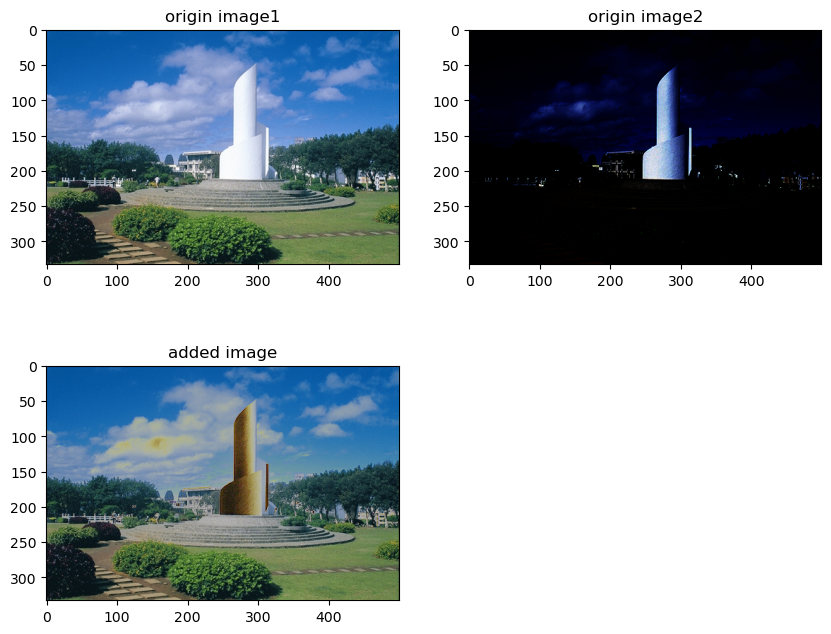

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c =  255.0 / ( 255.0 ** gamma )
    x  = np.linspace( 0, 255, 256)
    table = x ** gamma * c
    if f.ndim != 3:
        for x in range( nr ):
            for y in range( nc ):
                g[x,y] = table[f[x,y]]
    else:
        for x in range( nr ):
            for y in range( nc ):
                for k in range( 3 ):
                    g[x,y,k] = table[f[x,y,k]]
    return g


imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = gamma_correction( img1, 10.0 )
output = cv2.subtract(img1, img2)  

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image1') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('origin image2') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('added image') 
plt.imshow(output)

## 4.2 形態學的侵蝕(Erosion)與膨脹(Dilation)

<a href="https://hackmd.io/@cws0701/B1AxRjijq"> OpenCV 基礎篇-形態學(用於邊界抽取、輪廓處理)</a>

<a href="https://shengyu7697.github.io/python-opencv-erode-dilate/">  OpenCV 影像侵蝕 erode 與影像膨脹 dilate</a>    
使用方式：kernel = cv2.getStructuringElement(shape, ksize)     
指定大小形狀的結構元素，shape 的內容：     
cv2.MORPH_RECT ( 矩形 )、cv2.MORPH_CROSS ( 十字交叉 )、cv2.MORPH_ELLIPSE ( 橢圓形 )      
ksize 的格式：(x, y)       

img = cv2.erode(img, kernel [, iterations=1])   # 侵蝕     
img = cv2.dilate(img, kernel [, iterations=1])  # 擴張      

<a href="https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html">  OpenCV : Morphological Transformations</a> 

### <font color="Red"> Question: 為什麼『侵蝕』看起來像字的擴張、『擴張』看起來像字的侵蝕？

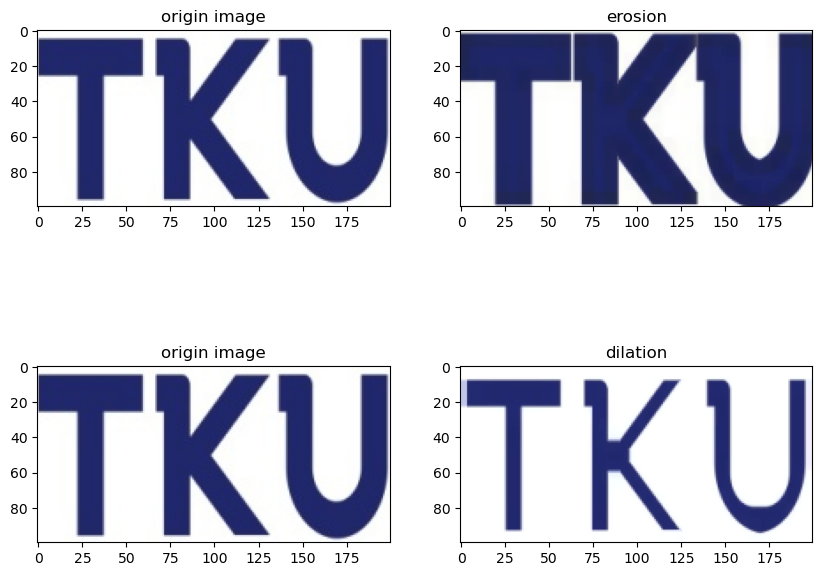

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU2.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
img_erode = cv2.erode(img, kernel)     
img_dilate = cv2.dilate(img, kernel)   

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,2)   
plt.title('erosion') 
plt.imshow(img_erode)
plt.subplot(2,2,3)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,4)   
plt.title('dilation') 
plt.imshow(img_dilate)

## <font color="Red"> 4.3 單次與多次之差異
    
<font color="Red"> 請使用 TKU3.jpg 影像，比較下列的處理結果，1和2或3哪一個效果比較接近：     
<font color="Red"> 1. 一次7x7的侵蝕與膨脹    
2. 兩次3x3的侵蝕與膨脹   
3. 兩次3x3的侵蝕與膨脹   

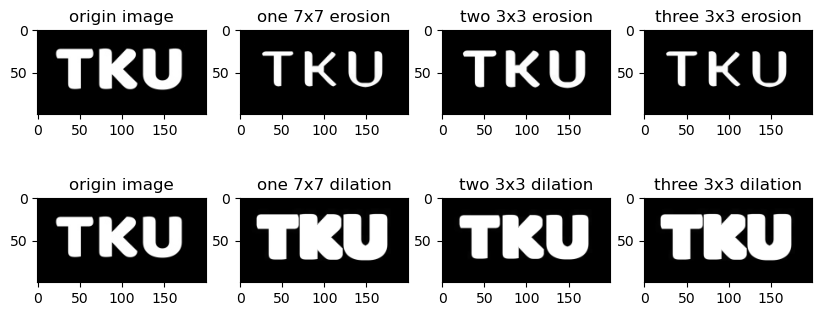

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU3.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]

#------------------------ Code Here -----------------------#


#------------------------ Code Here -----------------------#

plt.figure(figsize=(10, 4))
plt.subplot(2,4,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,4,2)   
plt.title('one 7x7 erosion') 
plt.imshow(img_erode)
plt.subplot(2,4,3)   
plt.title('two 3x3 erosion') 
plt.imshow(img_erode21)
plt.subplot(2,4,4) 
plt.title('three 3x3 erosion') 
plt.imshow(img_erode22)

plt.subplot(2,4,5)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,4,6)   
plt.title('one 7x7 dilation') 
plt.imshow(img_dilate)
plt.subplot(2,4,7)   
plt.title('two 3x3 dilation') 
plt.imshow(img_dilate21)
plt.subplot(2,4,8)   
plt.title('three 3x3 dilation') 
plt.imshow(img_dilate22)

## 4.4 形態學的過濾方式 
先侵蝕再膨脹的合成步驟
使用方式：
Opening = cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel)

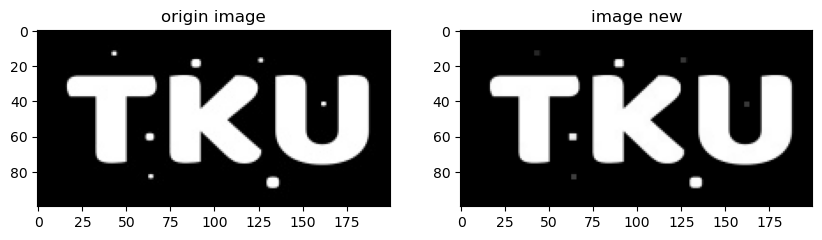

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU5.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_new = cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel) 

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,2)   
plt.title('image new') 
plt.imshow(img_new)


## <font color="Red"> 4.5 適當的參數選擇
調整使用方式kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
1. cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE 
2. kernel size (3,3), (5,5), (7,7), ...    

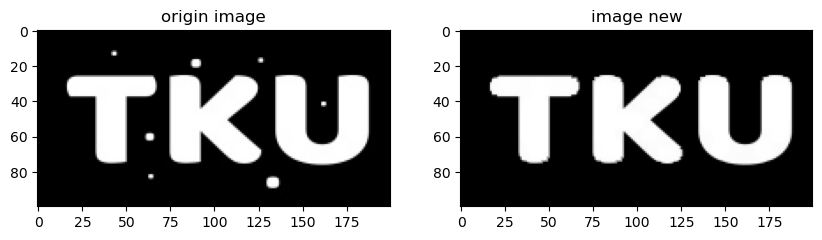

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU5.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
#------------------------ Code Here -----------------------#

#------------------------ Stop Here -----------------------#
img_new = cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel) 

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,2)   
plt.title('image new') 
plt.imshow(img_new)
